In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 15.0)

## 计算收得率

In [20]:
data = pd.read_excel('data1.xlsx')
# 计算加入的C、Mn元素质量、吸收质量、收得率
data.drop(data[data['连铸正样C'].isnull()].index,inplace=True)
c_t=['钒铁(FeV50-A)','钒铁(FeV50-B)','硅铝合金FeAl30Si25','硅锰面（硅锰渣）','硅铁(合格块)','硅铁FeSi75-B','石油焦增碳剂','锰硅合金FeMn64Si27(合格块)','锰硅合金FeMn68Si18(合格块)','碳化硅(55%)','硅钙碳脱氧剂']
c_p=[0.0031,0.0031,0.00374,0.017,0.0006,0.0006,0.96,0.017,0.017,0.3,0.225692308]
mn_t=['硅铝锰合金球','硅锰面（硅锰渣）','锰硅合金FeMn64Si27(合格块)','锰硅合金FeMn68Si18(合格块)']
mn_p = [0.3,0.664,0.664,0.664]

# 离群值处理
# outs=['转炉终点温度', '转炉终点C', '转炉终点Mn', '转炉终点S', '转炉终点P',
#        '转炉终点Si', '钢水净重', '连铸正样C', '连铸正样Mn', '连铸正样S', '连铸正样P', '连铸正样Si']
# for out in outs:
#     data.drop(data[(data[out]>(data[out].mean()+3*data[out].std()))|(data[out]<(data[out].mean()-3*data[out].std()))].index,inplace=True)
# data.drop(data[(data['转炉终点C']>0.002)|(data['转炉终点C']<0.0001)].index,inplace=True) 
# data.drop(data[(data['转炉终点C']>0.002)|(data['转炉终点C']<0.0001)].index,inplace=True) 
data['加入C含量']=(data[c_t]*c_p).sum(axis=1)
data['吸收C质量']=(data['连铸正样C']-data['转炉终点C'])*data['钢水净重']
data['C收得率'] = data['吸收C质量']/data['加入C含量']
data['加入Mn含量']=(data[mn_t]*mn_p).sum(axis=1)
data['吸收Mn质量']=(data['连铸正样Mn']-data['转炉终点Mn'])*data['钢水净重']
data['Mn收得率']=data['吸收Mn质量']/data['加入Mn含量']
# data.to_excel('q1_1_收得率.xls',index=False)
len(data)

810

In [7]:
data.isna().sum()

炉号                       0
钢种                       0
钢号                       0
转炉终点温度                   0
转炉终点C                    1
转炉终点Mn                 560
转炉终点S                    1
转炉终点P                  560
转炉终点Si                   1
钢水净重                     0
连铸正样C                    0
连铸正样Mn                   0
连铸正样S                    0
连铸正样P                    0
连铸正样Si                   0
连铸正样Ceq_val              0
连铸正样Cr                   0
连铸正样Ni_val               0
连铸正样Cu_val               0
连铸正样Nb_val             616
连铸正样V_val                0
连铸正样Alt_val              0
连铸正样Als_val              0
连铸正样Mo_val               0
连铸正样Ti_val              10
连铸正样N_val              810
连铸正样O_val              810
连铸正样B_val              739
氮化钒铁FeV55N11-A           0
低铝硅铁                     0
钒氮合金(进口)                 0
钒铁(FeV50-A)              0
钒铁(FeV50-B)              0
钒铁(FeV50-B).1            0
硅铝钙                      0
硅铝合金FeAl30Si25           0
硅铝锰合金球                   0
硅

In [38]:
plt.grid()

TypeError: 'str' object is not callable

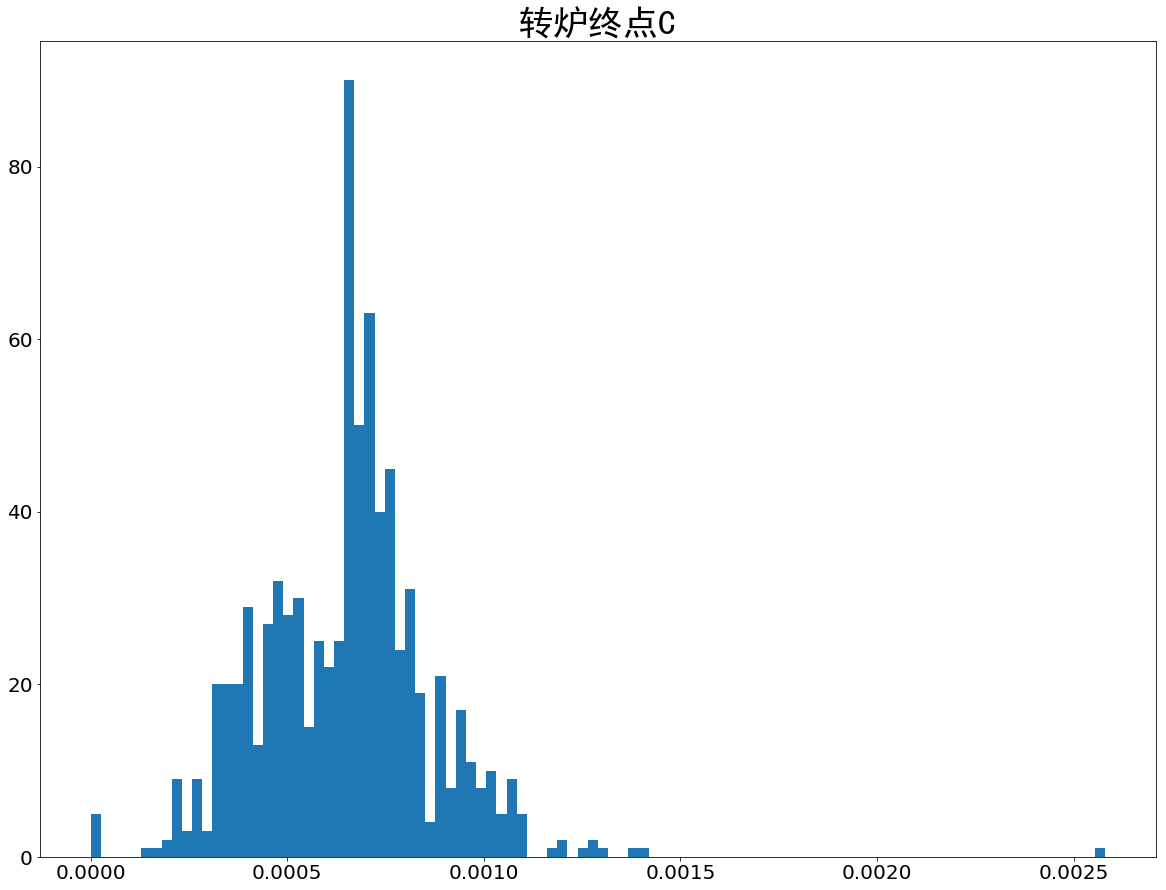

In [45]:
h = data['转炉终点C'].hist(bins=100,)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('转炉终点C',fontproperties="SimHei",fontsize=35)
h.grid(False)

In [1]:
# data.isnull().sum()

## 相关性分析

In [22]:
nume = ['转炉终点温度', '转炉终点C', '转炉终点S',
       '转炉终点Si', '钢水净重', 
#         '连铸正样C', '连铸正样Mn', '连铸正样S', '连铸正样P', '连铸正样Si',
#        '连铸正样Ceq_val', '连铸正样Cr', '连铸正样Ni_val', '连铸正样Cu_val', '连铸正样Nb_val',
#        '连铸正样V_val', '连铸正样Alt_val', '连铸正样Als_val', '连铸正样Mo_val', '连铸正样Ti_val',
        '氮化钒铁FeV55N11-A', '低铝硅铁',
       '钒氮合金(进口)', '钒铁(FeV50-A)', '钒铁(FeV50-B)', '钒铁(FeV50-B).1', '硅铝钙',
       '硅铝合金FeAl30Si25', '硅铝锰合金球', '硅锰面（硅锰渣）', '硅铁(合格块)', '硅铁FeSi75-B',
       '石油焦增碳剂', '锰硅合金FeMn64Si27(合格块)', '锰硅合金FeMn68Si18(合格块)', '碳化硅(55%)',
       '硅钙碳脱氧剂','C收得率','Mn收得率']

In [10]:
nm_df = data[nume].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [20]:
data[list(used.index)+['C收得率']].to_csv('C_train_data.csv',index=False)

In [28]:
data# C相关系数矩阵
c_corr = data[nume].corr()[['C收得率']]
used = c_corr[(abs(c_corr['C收得率'])>0.15)]
# c_corr.sort_values('C收得率',ascending=False)
used

,C收得率
转炉终点C,-0.288815
钢水净重,0.502615
低铝硅铁,0.411273
石油焦增碳剂,-0.268498
C收得率,1.000000
Mn收得率,0.725349


In [27]:
# Mn相关系数矩阵
c_corr = data[nume].corr()[['Mn收得率']]
used = c_corr[(abs(c_corr['Mn收得率'])>0.15)]
used.sort_values('Mn收得率')

,Mn收得率
碳化硅(55%),-0.216302
钒铁(FeV50-B).1,-0.186182
钒氮合金(进口),0.248616
C收得率,0.725349
低铝硅铁,0.940746
钢水净重,0.944048
Mn收得率,1.000000


In [22]:
data.head()

,炉号,钢种,钢号,转炉终点温度,转炉终点C,转炉终点Mn,转炉终点S,转炉终点P,转炉终点Si,钢水净重,...,硅铝锰合金球,硅锰面（硅锰渣）,硅铁(合格块),硅铁FeSi75-B,石油焦增碳剂,锰硅合金FeMn64Si27(合格块),锰硅合金FeMn68Si18(合格块),碳化硅(55%),硅钙碳脱氧剂,加入C含量
0,7A06878,低合金,HRB400B,1644.0,0.00065,0.0011,0.00030,0.00014,0.004,74400.0,...,0,0,0,0,85,1547,0,88,0,134.299
1,7A06877,低合金,HRB400B,1543.0,0.00077,0.0011,0.00039,0.00021,0.004,74200.0,...,0,0,0,0,68,1530,0,132,0,130.890
2,7A06876,低合金,HRB400B,1684.0,0.00035,0.0011,0.00024,0.00020,0.004,78250.0,...,0,0,0,0,90,0,1450,132,0,150.650
3,7A06875,低合金,HRB400B,1674.0,0.00048,0.0012,0.00036,0.00030,0.004,73600.0,...,0,0,0,0,85,0,1450,132,0,145.850
4,7A06874,低合金,HRB400B,1800.0,0.00036,0.0009,0.00028,0.00025,0.004,72400.0,...,0,0,0,0,90,0,1450,132,0,150.650
